In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

In [3]:
data = pd.read_csv('/content/insurance_price_prediction.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [6]:
data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [7]:
data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [13]:
data.replace({'sex' : {'male' : 1 , 'female' : 0} , 'smoker' : {'no' : 1 , 'yes' : 0} , 'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}} , inplace = True)

In [14]:
X = data.drop(columns = 'charges' , axis = 1)
Y = data['charges']

In [15]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 2)

In [16]:
model = LinearRegression()
model.fit(X_train , Y_train)

LinearRegression()

In [17]:
X_predictions = model.predict(X_train)
print(X_predictions)

[  478.49404197  9317.75369733 13193.79859142 ... 17327.55442479
  9600.51860822 13753.18970971]


In [21]:
# Training Accuracy
R2 = r2_score(Y_train , X_predictions)
print(R2)

36174978.427092075
0.751505643411174


In [23]:
#Test Accuracy
X_test_prediction = model.predict(X_test)
r2 = r2_score(Y_test , X_test_prediction)
print(r2)

0.7447273869684076


In [30]:
input = (100,0,	27.900, 	0 ,	0 , 1)
inputarray = np.asarray(input)
inputarray = inputarray.reshape(1,-1)
prediction = model.predict(inputarray)
print(prediction)

[45961.55429216]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


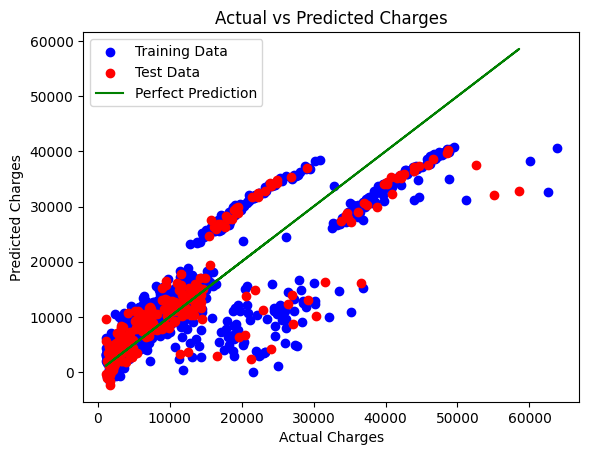

In [33]:
import matplotlib.pyplot as plt

# Scatter plot for training data
plt.scatter(Y_train, X_predictions, color='blue', label='Training Data')

# Scatter plot for test data
plt.scatter(Y_test, X_test_prediction, color='red', label='Test Data')

# Plotting the line y = x (perfect prediction)
plt.plot(Y_test, Y_test, color='green', label='Perfect Prediction')

plt.title('Actual vs Predicted Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.show()
